# Playing with Classifiers

## Integration test with Genetic Search
This section of notebook tests checks that classifiers can be used with Genetic Search. It is essentially the pipe example for segmentors, but using classifiers.

## Playing with Toy Dataset
The goal of this section is to recreate the **toy example** provided by the Sklearn tutorial at this [link](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).
We assume that the toy example used manually tuned classifiers to attain reasonably good fitness scores.
We will use genetic search to find tuned classifiers that have a **similar fitness scores** for the
same data sets.

In [1]:
from see.classifiers import Classifier
from see.classifier_fitness import ClassifierFitness
from see.Workflow import workflow


# Initialize Algorithm Space and Workflow
algorithm_space = Classifier.algorithmspace

workflow.addalgos([Classifier, ClassifierFitness])
wf = workflow()
print(wf)

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from see.base_classes import pipedata
from see.classifier_helpers import helpers
import numpy as np

# Create Data: Sklearn tutorial toy datasets
## Moons
moons_ds = pipedata()
moons_ds.name = 'Moons Dataset'
moons_ds.X, moons_ds.y = make_moons(noise=0.3, random_state=0)

## Circles
circles_ds = pipedata()
circles_ds.name = 'Circles Dataset'
circles_ds.X, circles_ds.y = make_circles(noise=0.2, factor=0.5, random_state=1)

## Linearly Seperable dataset
lin_ds = pipedata()
lin_ds.X, lin_ds.y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
lin_ds.name = 'Linearly Sepearble Dataset'
lin_ds.X += 2 * rng.uniform(size=lin_ds.X.shape)

datasets = [moons_ds, circles_ds, lin_ds]
validation_sets = []

# Preprocess data
for ds in datasets:
    ds.X = StandardScaler().fit_transform(ds.X)
    
# Split datasets into training, testing, and validation sets
for i, ds in enumerate(datasets):
    temp = helpers.generate_train_test_set(ds.X, ds.y)
    validation_sets.append(temp.testing_set)
    datasets[i] = helpers.generate_train_test_set(temp.training_set.X, temp.training_set.y)
    datasets[i].name = ds.name

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5
	length_scale = 1.0
	learning_rate = 0.1



In [2]:
%%time
from see import GeneticSearch
num_generations = 2
hof_per_dataset = []

for ds in datasets:
    print('Running ', ds.name)
    my_evolver = GeneticSearch.Evolver(workflow, ds, pop_size=100)
    my_evolver.run(ngen=num_generations)
    hof_per_dataset.append(my_evolver.hof) # Store the best solution found for each dataset

Running  Moons Dataset
Initializing a new random population
Generation 0/2 of population size 100
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 47
	alpha = 0.657
	max_depth = 7
	n_estimators = 75
	n_neighbors = 9
	length_scale = 0.8
	learning_rate = 0.2

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 27
	alpha = 0.367
	max_depth = 2
	n_estimators = 3
	n_neighbors = 7
	length_scale = 0.9
	learning_rate = 0.4

Time: 0.062 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 97
	alpha = 0.642
	max_depth = 5
	n_estimators = 82
	n_neighbors = 8
	length_scale = 0.6
	learning_rate = 0.9

Time: 0.183 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 28
	alpha = 0.051
	max_depth = 8
	n_estimators = 61
	n_neighbors = 1

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


Time: 0.247 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 12
	alpha = 0.193
	max_depth = 3
	n_estimators = 12
	n_neighbors = 6
	length_scale = 0.5
	learning_rate = 0.3

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Ada Boost
	max_iter = 65
	alpha = 0.251
	max_depth = 7
	n_estimators = 21
	n_neighbors = 9
	length_scale = 0.3
	learning_rate = 0.7

Time: 0.054 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 20
	alpha = 0.517
	max_depth = 1
	n_estimators = 8
	n_neighbors = 5
	length_scale = 0.3
	learning_rate = 0.3

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 83
	alpha = 0.587
	max_depth = 1
	n_estimators = 29
	n_neighbors = 1
	length_scale = 0.3
	learning_rat

Time: 0.054 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 76
	alpha = 0.992
	max_depth = 6
	n_estimators = 82
	n_neighbors = 9
	length_scale = 0.9
	learning_rate = 0.7

Time: 0.047 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 46
	alpha = 0.634
	max_depth = 6
	n_estimators = 58
	n_neighbors = 6
	length_scale = 0.8
	learning_rate = 0.9

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 92
	alpha = 0.396
	max_depth = 6
	n_estimators = 28
	n_neighbors = 4
	length_scale = 0.1
	learning_rate = 0.2

Time: 0.002 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 35
	alpha = 0.004
	max_depth = 1
	n_estimators = 21
	n_neighbors = 6
	length_scale = 0.2
	learning_rate = 0.9

RUNNING EVAL FOR GNB
Ti

Time: 0.133 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Ada Boost
	max_iter = 50
	alpha = 0.569
	max_depth = 5
	n_estimators = 55
	n_neighbors = 6
	length_scale = 0.2
	learning_rate = 0.9

Time: 0.115 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 29
	alpha = 0.927
	max_depth = 6
	n_estimators = 39
	n_neighbors = 3
	length_scale = 0.5
	learning_rate = 0.1

Time: 0.001 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Ada Boost
	max_iter = 8
	alpha = 0.933
	max_depth = 1
	n_estimators = 66
	n_neighbors = 9
	length_scale = 0.2
	learning_rate = 0.2

Time: 0.14 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 46
	alpha = 0.007
	max_depth = 1
	n_estimators = 99
	n_neighbors = 1
	length_scale = 0.5
	learning_rate = 0.4

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.125

<c

Time: 0.198 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gradient Boosting
	max_iter = 92
	alpha = 0.438
	max_depth = 7
	n_estimators = 45
	n_neighbors = 9
	length_scale = 0.7
	learning_rate = 0.6

Time: 0.04 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 99
	alpha = 0.873
	max_depth = 3
	n_estimators = 79
	n_neighbors = 2
	length_scale = 0.8
	learning_rate = 0.7

Time: 0.002 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Ada Boost
	max_iter = 49
	alpha = 0.385
	max_depth = 8
	n_estimators = 34
	n_neighbors = 6
	length_scale = 0.2
	learning_rate = 0.9

Time: 0.092 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gradient Boosting
	max_iter = 73
	alpha = 0.071
	max_depth = 9
	n_estimators = 62
	n_neighbors = 2
	length_scale = 0.7
	learning_rate = 0.5

Time: 0.066 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'

Time: 0.09 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 92
	alpha = 0.732
	max_depth = 6
	n_estimators = 8
	n_neighbors = 4
	length_scale = 0.8
	learning_rate = 0.6

RUNNING EVAL FOR GNB
Time: 0.004 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 65
	alpha = 0.636
	max_depth = 4
	n_estimators = 97
	n_neighbors = 9
	length_scale = 0.6
	learning_rate = 0.2

Time: 0.163 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 13
	alpha = 0.692
	max_depth = 7
	n_estimators = 71
	n_neighbors = 9
	length_scale = 0.7
	learning_rate = 0.5

Time: 0.133 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Extra Trees
	max_iter = 51
	alpha = 0.408
	max_depth = 8
	n_estimators = 44
	n_neighbors = 9
	length_scale = 0.5
	learning_rate = 0.5

Time: 0.059 s
fitness=0.083333333

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


Time: 0.171 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Ada Boost
	max_iter = 55
	alpha = 0.615
	max_depth = 1
	n_estimators = 64
	n_neighbors = 2
	length_scale = 0.8
	learning_rate = 0.4

Time: 0.117 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Ada Boost
	max_iter = 27
	alpha = 0.954
	max_depth = 4
	n_estimators = 65
	n_neighbors = 3
	length_scale = 0.5
	learning_rate = 0.6

Time: 0.115 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 11
	alpha = 0.331
	max_depth = 9
	n_estimators = 76
	n_neighbors = 2
	length_scale = 0.4
	learning_rate = 0.2

Time: 0.177 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 34
	alpha = 0.689
	max_depth = 8
	n_estimators = 67
	n_neighbors = 5
	length_scale = 0.7
	learning_rate = 0.1

Time: 0.126 s
fitness=0.20833333333333334

<class 'see.Workflow.w

Time: 0.05 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 61
	alpha = 0.709
	max_depth = 6
	n_estimators = 78
	n_neighbors = 9
	length_scale = 0.5
	learning_rate = 0.3

RUNNING EVAL FOR KNN
Time: 0.005 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Extra Trees
	max_iter = 64
	alpha = 0.906
	max_depth = 6
	n_estimators = 11
	n_neighbors = 2
	length_scale = 0.8
	learning_rate = 0.5

Time: 0.016 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 20
	alpha = 0.517
	max_depth = 1
	n_estimators = 8
	n_neighbors = 5
	length_scale = 0.3
	learning_rate = 0.3

RUNNING EVAL FOR KNN
Time: 0.005 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Extra Trees
	max_iter = 28
	alpha = 0.722
	max_depth = 4
	n_estimators = 92
	n_neighbors = 8
	length_scale = 0.9
	learning_rate = 0

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


Time: 0.146 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 47
	alpha = 0.543
	max_depth = 9
	n_estimators = 44
	n_neighbors = 8
	length_scale = 0.7
	learning_rate = 0.9

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Extra Trees
	max_iter = 6
	alpha = 0.903
	max_depth = 4
	n_estimators = 13
	n_neighbors = 6
	length_scale = 0.1
	learning_rate = 0.9

Time: 0.023 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 65
	alpha = 0.777
	max_depth = 6
	n_estimators = 59
	n_neighbors = 4
	length_scale = 0.5
	learning_rate = 0.5

RUNNING EVAL FOR KNN
Time: 0.006 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 74
	alpha = 0.089
	max_depth = 9
	n_estimators = 43
	n_neighbors = 9
	length_scale = 0.9
	learning_rat

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


Time: 0.062 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Ada Boost
	max_iter = 25
	alpha = 0.227
	max_depth = 4
	n_estimators = 44
	n_neighbors = 1
	length_scale = 0.3
	learning_rate = 0.7

Time: 0.075 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gradient Boosting
	max_iter = 22
	alpha = 0.499
	max_depth = 1
	n_estimators = 29
	n_neighbors = 9
	length_scale = 0.3
	learning_rate = 0.4

Time: 0.027 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gradient Boosting
	max_iter = 56
	alpha = 0.134
	max_depth = 8
	n_estimators = 31
	n_neighbors = 1
	length_scale = 0.7
	learning_rate = 0.4

Time: 0.029 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 16
	alpha = 0.377
	max_depth = 5
	n_estimators = 66
	n_neighbors = 1
	length_scale = 0.8
	learning_rate = 0.8

Time: 0.045 s
fitness=0.041666666666666664

<class 'see.Workflow.workf

Time: 0.144 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 25
	alpha = 0.274
	max_depth = 6
	n_estimators = 47
	n_neighbors = 9
	length_scale = 0.7
	learning_rate = 0.6

Time: 0.002 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gradient Boosting
	max_iter = 68
	alpha = 0.383
	max_depth = 8
	n_estimators = 45
	n_neighbors = 5
	length_scale = 0.7
	learning_rate = 0.2

Time: 0.03 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Ada Boost
	max_iter = 29
	alpha = 0.261
	max_depth = 6
	n_estimators = 95
	n_neighbors = 5
	length_scale = 0.9
	learning_rate = 0.4

Time: 0.156 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 33
	alpha = 0.582
	max_depth = 8
	n_estimators = 50
	n_neighbors = 6
	length_scale = 0.9
	learning_rate = 0.3

Time: 0.001 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> par

Time: 0.061 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 76
	alpha = 0.992
	max_depth = 6
	n_estimators = 82
	n_neighbors = 9
	length_scale = 0.9
	learning_rate = 0.7

Time: 0.048 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 30
	alpha = 0.27
	max_depth = 2
	n_estimators = 90
	n_neighbors = 2
	length_scale = 0.7
	learning_rate = 0.4

Time: 0.047 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 33
	alpha = 0.143
	max_depth = 1
	n_estimators = 69
	n_neighbors = 7
	length_scale = 0.8
	learning_rate = 0.1

Time: 0.046 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 61
	alpha = 0.709
	max_depth = 6
	n_estimators = 78
	n_neighbors = 9
	length_scale = 0.5
	learning_rate = 0.3

RUNNING EVAL FOR KNN
Time: 0.0

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of

Time: 0.065 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 30
	alpha = 0.27
	max_depth = 2
	n_estimators = 90
	n_neighbors = 2
	length_scale = 0.7
	learning_rate = 0.4

Time: 0.057 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 33
	alpha = 0.709
	max_depth = 6
	n_estimators = 78
	n_neighbors = 7
	length_scale = 0.5
	learning_rate = 0.3

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 61
	alpha = 0.143
	max_depth = 1
	n_estimators = 69
	n_neighbors = 9
	length_scale = 0.8
	learning_rate = 0.1

Time: 0.041 s
fitness=0.041666666666666664

#BEST [0.0,  ['K Nearest Neighbors', 81, 0.548, 1, 50, 3, 0.4, 0.8]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
us

Time: 0.139 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 31
	alpha = 0.312
	max_depth = 3
	n_estimators = 31
	n_neighbors = 7
	length_scale = 0.8
	learning_rate = 0.4

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Ada Boost
	max_iter = 36
	alpha = 0.186
	max_depth = 3
	n_estimators = 95
	n_neighbors = 3
	length_scale = 0.2
	learning_rate = 0.8

Time: 0.218 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 24
	alpha = 0.495
	max_depth = 6
	n_estimators = 35
	n_neighbors = 4
	length_scale = 0.7
	learning_rate = 0.4

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 88
	alpha = 0.12
	max_depth = 8
	n_estimators = 12
	n_neighbors = 3
	length_scale = 0.2
	learning_rate = 0.2

Time: 0.0

Time: 0.252 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 67
	alpha = 0.261
	max_depth = 1
	n_estimators = 57
	n_neighbors = 1
	length_scale = 0.5
	learning_rate = 0.9

Time: 0.292 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 4
	alpha = 0.483
	max_depth = 6
	n_estimators = 74
	n_neighbors = 6
	length_scale = 0.8
	learning_rate = 0.7

Time: 0.001 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 42
	alpha = 0.117
	max_depth = 9
	n_estimators = 91
	n_neighbors = 5
	length_scale = 0.6
	learning_rate = 0.2

Time: 0.149 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gradient Boosting
	max_iter = 40
	alpha = 0.544
	max_depth = 1
	n_estimators = 27
	n_neighbors = 9
	length_scale = 0.9
	learning_rate = 0.2

Time: 0.025 s
fitness=0.2916666666666667

<class 'see.Workflow.workflow'> parameters:

Time: 0.241 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Extra Trees
	max_iter = 35
	alpha = 0.866
	max_depth = 3
	n_estimators = 25
	n_neighbors = 5
	length_scale = 0.2
	learning_rate = 0.3

Time: 0.032 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 91
	alpha = 0.042
	max_depth = 1
	n_estimators = 84
	n_neighbors = 1
	length_scale = 0.5
	learning_rate = 0.9

Time: 0.137 s
fitness=0.2916666666666667

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 30
	alpha = 0.253
	max_depth = 3
	n_estimators = 30
	n_neighbors = 5
	length_scale = 0.7
	learning_rate = 0.8

Time: 0.255 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Extra Trees
	max_iter = 80
	alpha = 0.886
	max_depth = 7
	n_estimators = 75
	n_neighbors = 5
	length_scale = 0.9
	learning_rate = 0.7

Time: 0.107 s
fitness=0.25

<class 'see.Workflow

Time: 0.06 s
fitness=0.2916666666666667

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Extra Trees
	max_iter = 57
	alpha = 0.735
	max_depth = 4
	n_estimators = 97
	n_neighbors = 7
	length_scale = 0.1
	learning_rate = 0.2

Time: 0.139 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 22
	alpha = 0.447
	max_depth = 8
	n_estimators = 20
	n_neighbors = 5
	length_scale = 0.2
	learning_rate = 0.3

Time: 0.001 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 50
	alpha = 0.284
	max_depth = 1
	n_estimators = 77
	n_neighbors = 4
	length_scale = 0.1
	learning_rate = 0.1

Time: 0.06 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 68
	alpha = 0.5
	max_depth = 3
	n_estimators = 32
	n_neighbors = 1
	length_scale = 0.5
	learning_rate = 0.4

Time: 0.061 s
fitness=0.20833333333333334

<class 'see.Workflow.wor

Time: 0.003 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 28
	alpha = 0.912
	max_depth = 4
	n_estimators = 65
	n_neighbors = 8
	length_scale = 0.4
	learning_rate = 0.1

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 47
	alpha = 0.138
	max_depth = 4
	n_estimators = 2
	n_neighbors = 4
	length_scale = 0.3
	learning_rate = 0.7

Time: 0.044 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 1
	alpha = 0.423
	max_depth = 1
	n_estimators = 2
	n_neighbors = 2
	length_scale = 0.1
	learning_rate = 0.8

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 49
	alpha = 0.085
	max_depth = 5
	n_estimators = 9
	n_neighbors = 3
	length_scale = 0.2
	learning_rate = 0.1

RUNNING EVAL FOR K

Time: 0.254 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 10
	alpha = 0.372
	max_depth = 7
	n_estimators = 5
	n_neighbors = 8
	length_scale = 0.1
	learning_rate = 0.1

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 49
	alpha = 0.657
	max_depth = 9
	n_estimators = 65
	n_neighbors = 7
	length_scale = 0.1
	learning_rate = 0.7

Time: 0.232 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 28
	alpha = 0.74
	max_depth = 4
	n_estimators = 66
	n_neighbors = 4
	length_scale = 0.5
	learning_rate = 0.6

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 24
	alpha = 0.495
	max_depth = 6
	n_estimators = 31
	n_neighbors = 4
	length_scale = 0.7
	lea

Time: 0.082 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 71
	alpha = 0.792
	max_depth = 3
	n_estimators = 76
	n_neighbors = 5
	length_scale = 0.4
	learning_rate = 0.4

Time: 0.136 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 39
	alpha = 0.105
	max_depth = 5
	n_estimators = 70
	n_neighbors = 1
	length_scale = 0.8
	learning_rate = 0.9

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 58
	alpha = 0.447
	max_depth = 3
	n_estimators = 56
	n_neighbors = 1
	length_scale = 0.4
	learning_rate = 0.2

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Ada Boost
	max_iter = 18
	alpha = 0.514
	max_depth = 7
	n_estimators = 93
	n_neighbors = 1
	length_scale = 0.3
	learning_rate = 0.6

Time: 0.167 s
fitness=0.166

Time: 0.082 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 6
	alpha = 0.171
	max_depth = 4
	n_estimators = 39
	n_neighbors = 7
	length_scale = 0.4
	learning_rate = 0.3

Time: 0.259 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 63
	alpha = 0.001
	max_depth = 1
	n_estimators = 73
	n_neighbors = 5
	length_scale = 0.7
	learning_rate = 0.6

RUNNING EVAL FOR KNN
Time: 0.006 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 47
	alpha = 0.294
	max_depth = 7
	n_estimators = 72
	n_neighbors = 9
	length_scale = 0.3
	learning_rate = 0.4

Time: 0.241 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 56
	alpha = 0.656
	max_depth = 6
	n_estimators = 43
	n_neighbors = 7
	length_scale = 0.5
	learning_rate = 0.9

Time: 0.07 s
fitness=0.25



Time: 0.275 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 6
	alpha = 0.605
	max_depth = 1
	n_estimators = 10
	n_neighbors = 6
	length_scale = 0.6
	learning_rate = 0.9

Time: 0.018 s
fitness=0.3333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Extra Trees
	max_iter = 48
	alpha = 0.201
	max_depth = 6
	n_estimators = 74
	n_neighbors = 9
	length_scale = 0.4
	learning_rate = 0.5

Time: 0.096 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 94
	alpha = 0.128
	max_depth = 6
	n_estimators = 87
	n_neighbors = 7
	length_scale = 0.5
	learning_rate = 0.4

RUNNING EVAL FOR KNN
Time: 0.005 s
fitness=0.2916666666666667

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 24
	alpha = 0.495
	max_depth = 6
	n_estimators = 35
	n_neighbors = 4
	length_scale = 0.7
	learning_rate = 0.4

RUNNING EVAL FOR GN

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Time: 0.004 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 7
	alpha = 0.212
	max_depth = 5
	n_estimators = 24
	n_neighbors = 1
	length_scale = 0.3
	learning_rate = 0.6

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 18
	alpha = 0.689
	max_depth = 6
	n_estimators = 25
	n_neighbors = 3
	length_scale = 0.2
	learning_rate = 0.4

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 93
	alpha = 0.35
	max_depth = 8
	n_estimators = 34
	n_neighbors = 2
	length_scale = 0.5
	learning_rate = 0.9

Time: 0.002 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 87
	alpha = 0.285
	max_depth = 4
	n_estimators = 40
	n_neighbors = 2
	length_scale = 0.7
	learning

Time: 0.226 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 37
	alpha = 0.673
	max_depth = 4
	n_estimators = 1
	n_neighbors = 7
	length_scale = 0.9
	learning_rate = 0.2

Time: 0.05 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gradient Boosting
	max_iter = 21
	alpha = 0.419
	max_depth = 1
	n_estimators = 71
	n_neighbors = 4
	length_scale = 0.6
	learning_rate = 0.8

Time: 0.04 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Extra Trees
	max_iter = 64
	alpha = 0.529
	max_depth = 5
	n_estimators = 66
	n_neighbors = 2
	length_scale = 0.5
	learning_rate = 0.5

Time: 0.082 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Ada Boost
	max_iter = 36
	alpha = 0.408
	max_depth = 8
	n_estimators = 81
	n_neighbors = 5
	length_scale = 0.2
	learning_rate = 0.2

Time: 0.144 s
fitness=0.041666666666666664

<clas

Time: 0.052 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 62
	alpha = 0.108
	max_depth = 4
	n_estimators = 39
	n_neighbors = 6
	length_scale = 0.4
	learning_rate = 0.1

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gradient Boosting
	max_iter = 64
	alpha = 0.347
	max_depth = 5
	n_estimators = 72
	n_neighbors = 2
	length_scale = 0.5
	learning_rate = 0.4

Time: 0.042 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gradient Boosting
	max_iter = 30
	alpha = 0.339
	max_depth = 6
	n_estimators = 31
	n_neighbors = 6
	length_scale = 0.9
	learning_rate = 0.5

Time: 0.021 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 56
	alpha = 0.586
	max_depth = 5
	n_estimators = 40
	n_neighbors = 7
	length_scale = 0.6
	learning_rate = 0.9

Time: 0.052 s
fitness=


RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gradient Boosting
	max_iter = 65
	alpha = 0.497
	max_depth = 1
	n_estimators = 54
	n_neighbors = 6
	length_scale = 0.9
	learning_rate = 0.2

Time: 0.037 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 36
	alpha = 0.831
	max_depth = 6
	n_estimators = 68
	n_neighbors = 1
	length_scale = 0.5
	learning_rate = 0.3

Time: 0.238 s
fitness=0.08333333333333333

#BEST [0.041666666666666664,  ['Random Forest', 87, 0.202, 7, 28, 1, 0.5, 0.9]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow m

Time: 0.096 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 51
	alpha = 0.419
	max_depth = 5
	n_estimators = 93
	n_neighbors = 7
	length_scale = 0.6
	learning_rate = 0.9

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 88
	alpha = 0.015
	max_depth = 2
	n_estimators = 85
	n_neighbors = 6
	length_scale = 0.4
	learning_rate = 0.4

Time: 0.062 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 64
	alpha = 0.02
	max_depth = 1
	n_estimators = 42
	n_neighbors = 6
	length_scale = 0.4
	learning_rate = 0.5

Time: 0.068 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 56
	alpha = 0.43
	max_depth = 7
	n_estimators = 65
	n_neighbors = 9
	length_scale = 0.5
	learning_rate = 0.7

Time: 0.001 s
fitne

Time: 0.231 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gradient Boosting
	max_iter = 48
	alpha = 0.199
	max_depth = 4
	n_estimators = 34
	n_neighbors = 8
	length_scale = 0.5
	learning_rate = 0.2

Time: 0.021 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 96
	alpha = 0.583
	max_depth = 3
	n_estimators = 87
	n_neighbors = 3
	length_scale = 0.5
	learning_rate = 0.9

RUNNING EVAL FOR KNN
Time: 0.005 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 9
	alpha = 0.457
	max_depth = 6
	n_estimators = 51
	n_neighbors = 1
	length_scale = 0.6
	learning_rate = 0.4

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 49
	alpha = 0.8
	max_depth = 5
	n_estimators = 31
	n_neighbors = 3
	length_scale = 0.8
	learning_rate = 0.1

Time: 0.252 s
f

Time: 0.047 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 33
	alpha = 0.144
	max_depth = 7
	n_estimators = 82
	n_neighbors = 2
	length_scale = 0.5
	learning_rate = 0.3

Time: 0.002 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gradient Boosting
	max_iter = 66
	alpha = 0.076
	max_depth = 3
	n_estimators = 71
	n_neighbors = 8
	length_scale = 0.6
	learning_rate = 0.2

Time: 0.048 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 93
	alpha = 0.35
	max_depth = 8
	n_estimators = 34
	n_neighbors = 2
	length_scale = 0.5
	learning_rate = 0.9

Time: 0.002 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Ada Boost
	max_iter = 36
	alpha = 0.202
	max_depth = 8
	n_estimators = 81
	n_neighbors = 1
	length_scale = 0.2
	learning_rate = 0.2

Time: 0.136 s
fitness=0.041666666666666664

<class 'see.Work

Time: 0.216 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 78
	alpha = 0.597
	max_depth = 1
	n_estimators = 88
	n_neighbors = 9
	length_scale = 0.9
	learning_rate = 0.6

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 30
	alpha = 0.922
	max_depth = 7
	n_estimators = 40
	n_neighbors = 5
	length_scale = 0.4
	learning_rate = 0.4

Time: 0.043 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Ada Boost
	max_iter = 82
	alpha = 0.724
	max_depth = 1
	n_estimators = 28
	n_neighbors = 9
	length_scale = 0.9
	learning_rate = 0.6

Time: 0.053 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 4
	alpha = 0.907
	max_depth = 5
	n_estimators = 75
	n_neighbors = 7
	length_scale = 0.1
	learning_rate = 0.5

RUNNING EVAL 

Time: 0.176 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 9
	alpha = 0.818
	max_depth = 1
	n_estimators = 45
	n_neighbors = 6
	length_scale = 0.2
	learning_rate = 0.6

Time: 0.001 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 90
	alpha = 0.566
	max_depth = 7
	n_estimators = 95
	n_neighbors = 1
	length_scale = 0.3
	learning_rate = 0.7

Time: 0.002 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 8
	alpha = 0.418
	max_depth = 9
	n_estimators = 50
	n_neighbors = 1
	length_scale = 0.1
	learning_rate = 0.2

RUNNING EVAL FOR KNN
Time: 0.005 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gradient Boosting
	max_iter = 87
	alpha = 0.901
	max_depth = 8
	n_estimators = 99
	n_neighbors = 6
	length_scale = 0.8
	learning_rate = 0.4

Time: 0.058 s
fitness=0.08333333

Time: 0.146 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 84
	alpha = 0.516
	max_depth = 2
	n_estimators = 18
	n_neighbors = 8
	length_scale = 0.4
	learning_rate = 0.8

Time: 0.047 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Extra Trees
	max_iter = 30
	alpha = 0.481
	max_depth = 8
	n_estimators = 20
	n_neighbors = 7
	length_scale = 0.2
	learning_rate = 0.1

Time: 0.025 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Extra Trees
	max_iter = 74
	alpha = 0.73
	max_depth = 4
	n_estimators = 52
	n_neighbors = 5
	length_scale = 0.6
	learning_rate = 0.9

Time: 0.062 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 32
	alpha = 0.804
	max_depth = 4
	n_estimators = 25
	n_neighbors = 2
	length_scale = 0.9
	learning_rate = 0.3

Time: 0.048 s
fitness=0.08333333333333333

<class 'see.Workflo

In [3]:
for hof in hof_per_dataset:
    print(hof)

[['K Nearest Neighbors', 81, 0.548, 1, 50, 3, 0.4, 0.8], ['K Nearest Neighbors', 23, 0.129, 9, 80, 3, 0.6, 0.9], ['K Nearest Neighbors', 91, 0.586, 2, 16, 3, 0.9, 0.5], ['K Nearest Neighbors', 23, 0.129, 2, 67, 3, 0.1, 0.9], ['K Nearest Neighbors', 32, 0.548, 1, 80, 3, 0.9, 0.8], ['K Nearest Neighbors', 23, 0.129, 2, 67, 3, 0.9, 0.9], ['K Nearest Neighbors', 32, 0.548, 1, 80, 3, 0.1, 0.8], ['K Nearest Neighbors', 91, 0.586, 9, 16, 3, 0.6, 0.5], ['K Nearest Neighbors', 23, 0.129, 2, 80, 3, 0.9, 0.9], ['K Nearest Neighbors', 32, 0.548, 1, 67, 3, 0.1, 0.8]]
[['Gaussian Naive Bayes', 24, 0.495, 6, 35, 4, 0.7, 0.4], ['Gaussian Naive Bayes', 31, 0.312, 3, 31, 7, 0.8, 0.4], ['Random Forest', 2, 0.876, 7, 8, 1, 0.4, 0.7], ['Gaussian Naive Bayes', 21, 0.998, 5, 9, 7, 0.3, 0.4], ['Gaussian Naive Bayes', 17, 0.748, 5, 14, 4, 0.6, 0.7], ['Gaussian Naive Bayes', 86, 0.114, 4, 37, 1, 0.5, 0.2], ['MLP Neural Network', 12, 0.009, 5, 67, 8, 0.9, 0.7], ['Gaussian Naive Bayes', 10, 0.372, 7, 5, 8, 0.1, 0

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB


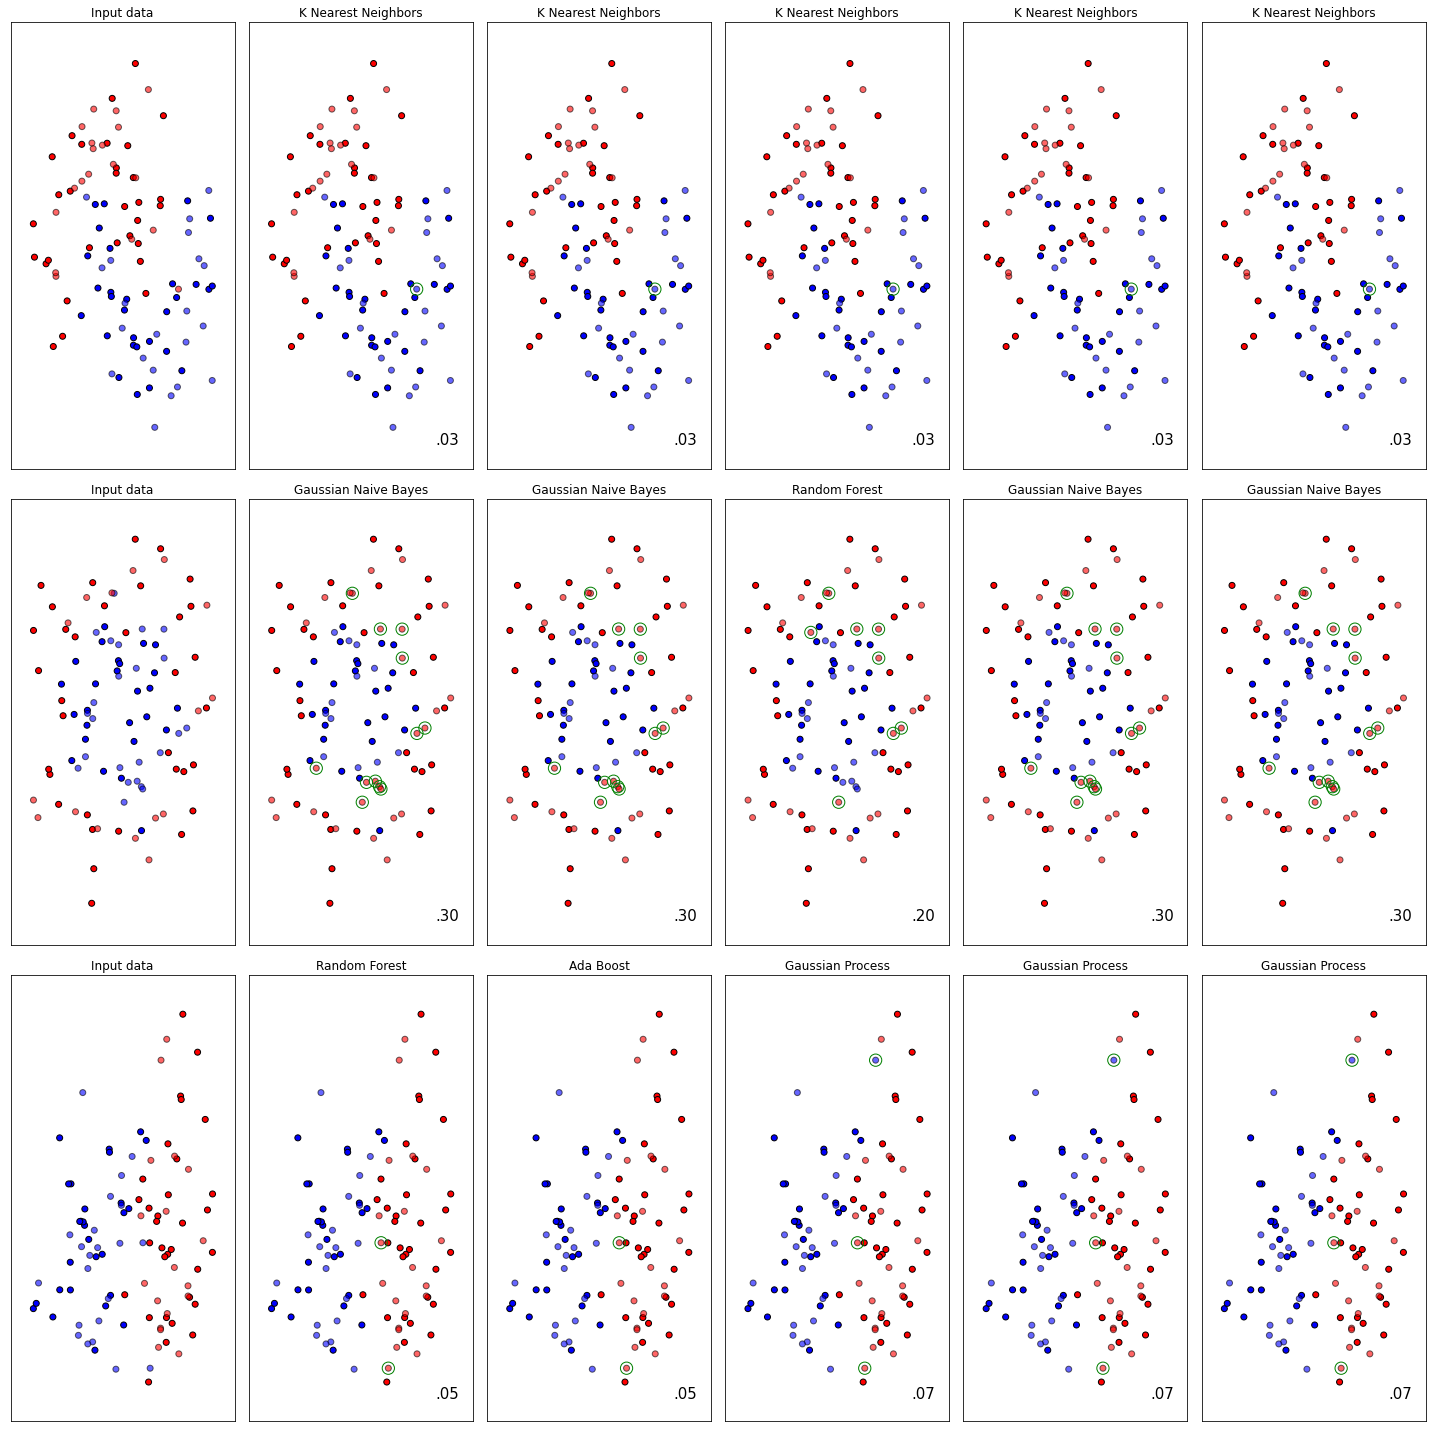

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# For these plots we perform our validation test

# Color Maps
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

figure = plt.figure(figsize=(20, 20))

i = 1
for j, ds in enumerate(datasets):
    # We will test the found top five best algorithms
    # We train the datasets in the same way done during genetic search
    # We test against the validation set
    top_n = 5
    training_set = pipedata()
    training_set.X = np.concatenate((ds.training_set.X, ds.testing_set.X), axis=0)
    training_set.y = np.concatenate((ds.training_set.y, ds.testing_set.y), axis=0)

    testing_set = validation_sets[j]
    
    # Create Mesh Grid
    h = 0.02
    
    X = np.concatenate((training_set.X, testing_set.X), axis=0)
    y = np.concatenate((training_set.y, testing_set.y), axis=0)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

    ax = plt.subplot(len(datasets), top_n+1, i)

    # Plot the training points and testing points (Input data)
    ax.scatter(training_set.X[:, 0], training_set.X[:, 1], c=training_set.y, cmap=cm_bright,
               edgecolors='k')
    ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=testing_set.y, cmap=cm_bright, alpha=0.6,
           edgecolors='k')

    # Format plot
    ax.set_title("Input data")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i+=1
    hof = hof_per_dataset[j]

    top_inds = hof[:top_n]
    #print(top_inds)
    for ind in top_inds:
        # Initialize classifier
        #print(ind)
        algo_name = ind[0]
        param_list = ind

        clf = Classifier.algorithmspace[algo_name](param_list)

        predictions = clf.evaluate(training_set, testing_set)

        score = ClassifierFitness().evaluate(predictions, testing_set.y)

        ax = plt.subplot(len(datasets), top_n+1, i)

        # Plot the training points and testing points (Input data)
        ax.scatter(training_set.X[:, 0], training_set.X[:, 1], c=training_set.y, cmap=cm_bright,
                   edgecolors='k')
        # Plot predictions and fitness score
        ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=predictions, cmap=cm_bright, alpha=0.6,
               edgecolors='k')

        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')

        # Highlight/circle errors
        errors = testing_set.X[predictions != testing_set.y]

        for mistake in errors:
            #err = testing_set.X[mistake,:]
            ax.scatter(mistake[0], mistake[1], marker='o', s=150, lw=1, color="green", facecolor="none")

        # Format plot
        ax.set_title(algo_name)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        #print(i)
        i+=1

plt.tight_layout()

In [ ]:
# Display sklearn classification images

In [80]:
sklearn_best_accuracy = [0.97, 0.93, 0.95]  # ordered according to dataset

# find best scores from see-classify
# accuracy = 1 - fitness
best_fitness_scores = [1, 1, 1]

import numpy as np
from math import floor

for j, ds in enumerate(datasets):
    # We will test the found top five best algorithms
    # We train the datasets in the same way done during genetic search
    # We test against the validation set
    top_n = 5
    training_set = pipedata()
    training_set.X = np.concatenate((ds.training_set.X, ds.testing_set.X), axis=0)
    training_set.y = np.concatenate((ds.training_set.y, ds.testing_set.y), axis=0)

    testing_set = validation_sets[j]

    hof = hof_per_dataset[j]

    top_inds = hof[:top_n]
    for ind in top_inds:
        # Initialize classifier
        algo_name = ind[0]
        param_list = ind

        clf = Classifier.algorithmspace[algo_name](param_list)

        predictions = clf.evaluate(training_set, testing_set)

        score = ClassifierFitness().evaluate(predictions, testing_set.y)
        if score < best_fitness_scores[j]:
            best_fitness_scores[j] = score

see_best_accuracy = list(map(lambda fitness: (1 - fitness), best_fitness_scores))

dataset_names = ["Moons", "Circles", "Linearly Separable"]

import pandas as pd

index = pd.Index(dataset_names, name='Dataset Name')
table = pd.DataFrame(
    index=index,
    data={"Manually-Tuned Accuracy": sklearn_best_accuracy, "GA-Tuned Accuracy": see_best_accuracy},
)

table

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB


,Manually-Tuned,GA-Tuned Accuracy
Dataset Name,,
Moons,0.97,0.975
Circles,0.93,0.800
Linearly Separable,0.95,0.950


## Replicating existing research (draft/incomplete)
The goal of this section is to partially redo the results of the research done in [this paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6878785/) and ideally others. This serves as a proof of concept that
see-classify could be used by scientists to find classification algorithms for their datasets.

The reason we say 'partially' is because the research uses genetic algorithms to compare and
find optimal workflows that include a pre-processing stage using PCA before applying the classification
algorith. Since see-classify only provides a search space for classification algorithms, we 
will not be able to fully replicate the results. Another weak point is that see-classify
currently uses a simple fitness function; however, the work in the paper uses a couple 
different fitness functions. It also uses KFolds Cross-Validation, which is not supported.
Both of these have been marked as TODOs.

### Habib Dhahri et al. 2019
[Link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6878785/)

#### Import data and initialize search space and workflow

In [35]:
%%time

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from see.base_classes import pipedata
from see.classifier_helpers import helpers
from see import GeneticSearch
from see.classifiers import Classifier
from see.classifier_fitness import ClassifierFitness
from see.Workflow import workflow
import random
#random.seed(10)

# Initialize Algorithm Space and Workflow
algorithm_space = Classifier.algorithmspace

workflow.addalgos([Classifier, ClassifierFitness])
wf = workflow()

# Breast Cancer Data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
data = pd.read_csv(url, header=None)

X = data.iloc[:,2:].to_numpy()

def diagnosis_to_category(d):
    if d == 'M':
        return 0
    elif d == 'B':
        return 1
    else:
        print('WARNING: UNKNOWN Category')

# Turn classifications Malignant(M)/Benign(B) into binary (0/1) assignments
y = np.vectorize(diagnosis_to_category)(data[1].to_numpy())

sample_sizes = [100, 150, 200, 250, 300, 350, 400]
#sample_sizes = [100, 150, 200]

hof_per_sample_size = []
# TODO PARALLELIZE b/c genetic search takes a while
for num_samples in sample_sizes:
    num_samples = 200
    # Select a fixed number of samples
    X = X[0:num_samples]
    y = y[0:num_samples]

    # Preprocess data
    X = StandardScaler().fit_transform(X)

    # Feature Selection
    # src: https://scikit-learn.org/stable/auto_examples/compose/plot_feature_union.html
    from sklearn.pipeline import FeatureUnion
    from sklearn.decomposition import PCA

    # Table 1 suggests using 12 components for GAs
    pca = PCA(n_components=12)

    # Use feature union in case we want to combine multiple feature selections later
    combined_features = FeatureUnion([("pca", pca)])

    # Use combined features to transform dataset:
    X_features = combined_features.fit(X, y).transform(X)

    # Paper uses KFolds Cross Validation with k=10
    dataset = helpers.generate_tuning_trials(X_features, y, num_trials=10)

    # RUN GENETIC SEARCH
    mydata = dataset
    num_generations = 2
    my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=5)

    # warnings may appear when this runs
    population = my_evolver.run(ngen=num_generations)
    hof_per_sample_size.append(my_evolver.hof)

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Initializing a new random population
Generation 0/2 of population size 5
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 55
	alpha = 0.229
	max_depth = 3
	n_estimators = 9
	n_neighbors = 8
	length_scale = 0.3

Time: 31.304 s
fitness=0.045

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 24
	alpha = 0.675
	max_depth = 2
	n_estimators = 5
	n_neighbors = 8
	length_scale = 0.5

Time: 19.047 s
fitness=0.05

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 83
	alpha = 0.464
	max_depth = 5
	n_estimators = 8
	n_neighbors = 5
	length_scale = 0.6

Time: 20.605 s
fitness=0.05

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 63
	alpha = 0.53
	max_depth = 1
	n_estimators = 3
	n_neighbors = 8
	length_scale = 0.5

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNI

Time: 29.287 s
fitness=0.045

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 83
	alpha = 0.464
	max_depth = 5
	n_estimators = 8
	n_neighbors = 5
	length_scale = 0.6

Time: 20.094 s
fitness=0.05

#BEST [0.045,  ['MLP Neural Network', 55, 0.229, 3, 9, 8, 0.3]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
Generation 2/2 of population size 5
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 8
	alpha = 0.773
	max_depth = 5
	n_estimators = 4
	n_neighbors = 6
	length_scale = 0.7

Time: 0.106 s
fitness=0.095

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 2
	alpha = 0.567
	max_depth = 5
	n_estimators = 3
	n_neighbors = 3
	length_scale = 0.2

Time: 27.698 s
fitness=0.055000000000

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


Time: 36.731 s
fitness=0.10000000000000002

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 83
	alpha = 0.464
	max_depth = 5
	n_estimators = 9
	n_neighbors = 5
	length_scale = 0.6

Time: 32.214 s
fitness=0.05

#BEST [0.05,  ['MLP Neural Network', 83, 0.464, 5, 9, 5, 0.6]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
Initializing a new random population
Generation 0/2 of population size 5
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Time: 0.552 s
fitness=0.26999999999999996

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 56
	alpha = 0.551
	max_depth = 5
	n_estimators = 2
	n_neighbors = 3
	length_scale = 0.9

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
R

Time: 0.674 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 57
	alpha = 0.997
	max_depth = 2
	n_estimators = 8
	n_neighbors = 2
	length_scale = 0.4

Time: 29.773 s
fitness=0.05

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 56
	alpha = 0.551
	max_depth = 5
	n_estimators = 8
	n_neighbors = 3
	length_scale = 0.9

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
R

Time: 29.161 s
fitness=0.05

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 57
	alpha = 0.997
	max_depth = 2
	n_estimators = 8
	n_neighbors = 2
	length_scale = 0.4

Time: 29.15 s
fitness=0.05

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 57
	alpha = 0.997
	max_depth = 2
	n_estimators = 2
	n_neighbors = 2
	length_scale = 0.4

Time: 27.626 s
fitness=0.05

#BEST [0.04,  ['K Nearest Neighbors', 89, 0.107, 1, 7, 7, 0.6]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Time: 24.456 s
fitness=0.05

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 56
	alpha = 0.293
	max_depth = 7
	n_estimators = 2
	n_neighbors = 3
	length_scale = 0.4

Time: 26.987 s
fitness=0.05

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 50
	alpha = 0.369
	max_depth = 6
	n_estimators = 1
	n_neighbors = 8
	length_scale = 0.1

Time: 0.741 s
fitness=0.24499999999999997

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 14
	alpha = 0.113
	max_depth = 3
	n_estimators = 3
	n_neighbors = 3
	length_scale = 0.2

Time: 37.924 s
fitness=0.05

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 21
	alpha = 0.038
	max_depth = 2
	n_estimators = 1
	n_neighbors = 8
	length_scale = 0.7

Time: 0.237 s
fitness=0.16499999999999998

#BEST [0.05,  ['MLP Neural Network', 14, 0.113, 3, 3, 3, 0.2]]
Mutating Population
using workflow mutate algorithm and looping 

Time: 31.392 s
fitness=0.045

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 14
	alpha = 0.113
	max_depth = 3
	n_estimators = 3
	n_neighbors = 3
	length_scale = 0.2

Time: 30.564 s
fitness=0.045

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 38
	alpha = 0.918
	max_depth = 2
	n_estimators = 3
	n_neighbors = 6
	length_scale = 0.9

Time: 32.991 s
fitness=0.05

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 14
	alpha = 0.113
	max_depth = 3
	n_estimators = 2
	n_neighbors = 3
	length_scale = 0.2

Time: 30.0 s
fitness=0.05500000000000001

#BEST [0.045,  ['MLP Neural Network', 75, 0.955, 6, 9, 4, 0.5]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Time: 22.031 s
fitness=0.05

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 73
	alpha = 0.187
	max_depth = 9
	n_estimators = 4
	n_neighbors = 3
	length_scale = 0.7

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL F

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL 

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


Time: 39.256 s
fitness=0.10000000000000002

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 33
	alpha = 0.099
	max_depth = 2
	n_estimators = 3
	n_neighbors = 9
	length_scale = 0.9

Time: 33.948 s
fitness=0.045

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 33
	alpha = 0.099
	max_depth = 2
	n_estimators = 3
	n_neighbors = 9
	length_scale = 0.9

Time: 18.928 s
fitness=0.05

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 61
	alpha = 0.901
	max_depth = 7
	n_estimators = 3
	n_neighbors = 1
	length_scale = 0.9

Time: 33.476 s
fitness=0.045

#BEST [0.045,  ['MLP Neural Network', 61, 0.901, 7, 3, 1, 0.9]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow muta

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Time: 0.65 s
fitness=0.13

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 48
	alpha = 0.655
	max_depth = 5
	n_estimators = 4
	n_neighbors = 1
	length_scale = 0.8

Time: 0.64 s
fitness=0.12

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 36
	alpha = 0.289
	max_depth = 1
	n_estimators = 6
	n_neighbors = 3
	length_scale = 0.3

Time: 34.488 s
fitness=0.045

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 47
	alpha = 0.929
	max_depth = 7
	n_estimators = 6
	n_neighbors = 3
	length_scale = 0.7

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING

Time: 36.902 s
fitness=0.045

#BEST [0.045,  ['MLP Neural Network', 36, 0.626, 1, 8, 7, 0.3]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
Generation 2/2 of population size 5
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 27
	alpha = 0.157
	max_depth = 8
	n_estimators = 2
	n_neighbors = 4
	length_scale = 0.3

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR K

Time: 31.681 s
fitness=0.045

#BEST [0.04,  ['K Nearest Neighbors', 93, 0.543, 8, 7, 7, 0.6]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
Initializing a new random population
Generation 0/2 of population size 5
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 6
	alpha = 0.878
	max_depth = 3
	n_estimators = 7
	n_neighbors = 9
	length_scale = 0.6



/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Time: 1.04 s
fitness=0.13499999999999998

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 76
	alpha = 0.407
	max_depth = 5
	n_estimators = 6
	n_neighbors = 2
	length_scale = 0.9

Time: 0.935 s
fitness=0.10500000000000001

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 50
	alpha = 0.032
	max_depth = 7
	n_estimators = 7
	n_neighbors = 2
	length_scale = 0.8

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR 

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.257 s
fitness=0.05499999999999999

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 50
	alpha = 0.032
	max_depth = 7
	n_estimators = 7
	n_neighbors = 2
	length_scale = 0.8

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
R

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL 

Time: 21.696 s
fitness=0.05

#BEST [0.05,  ['Gaussian Process', 76, 0.757, 9, 6, 4, 0.6]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
Initializing a new random population
Generation 0/2 of population size 5
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 47
	alpha = 0.74
	max_depth = 8
	n_estimators = 2
	n_neighbors = 7
	length_scale = 0.9



/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Time: 21.84 s
fitness=0.05

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 2
	alpha = 0.931
	max_depth = 1
	n_estimators = 2
	n_neighbors = 3
	length_scale = 0.5

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR

Time: 22.408 s
fitness=0.05

#BEST [0.045,  ['MLP Neural Network', 37, 0.645, 4, 3, 9, 0.9]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
Generation 2/2 of population size 5
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 62
	alpha = 0.97
	max_depth = 4
	n_estimators = 5
	n_neighbors = 1
	length_scale = 0.1

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL F

In [38]:
# Extract best fitness for each sample size
best_fitness = []
for hof in hof_per_sample_size:
    best_ind = hof[0]
    fitness = best_ind.fitness.values[0]
    best_fitness.append(fitness)
best_fitness

[0.05, 0.04, 0.045, 0.045, 0.04, 0.05, 0.045]

#### Genetic Search

In [17]:
%%time
mydata = dataset
num_generations = 2
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=5)

# warnings may appear when this runs
population = my_evolver.run(ngen=num_generations)

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Initializing a new random population
Generation 0/2 of population size 5
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 80
	alpha = 0.346
	max_depth = 8
	n_estimators = 7
	n_neighbors = 8
	length_scale = 0.5

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL 

Time: 19.468 s
fitness=0.05

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 93
	alpha = 0.058
	max_depth = 9
	n_estimators = 1
	n_neighbors = 1
	length_scale = 0.5

Time: 19.923 s
fitness=0.045

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 80
	alpha = 0.346
	max_depth = 8
	n_estimators = 7
	n_neighbors = 8
	length_scale = 0.5

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR 

### Comparison with figure 17
TODO: Get training fitness

In [15]:
# This compares the GA results with the results of figure 17
# Question: How do they obtain validation accuracy? I think it is the HOF accuracy?

#### Validation Test (TODO: DELETE SECTION)

[['Gaussian Process', 35, 0.759, 4, 4, 6, 0.9], ['MLP Neural Network', 80, 0.387, 1, 8, 3, 0.1], ['MLP Neural Network', 11, 0.387, 7, 3, 3, 0.7], ['MLP Neural Network', 80, 0.341, 1, 8, 3, 0.1], ['MLP Neural Network', 11, 0.387, 7, 3, 5, 0.7]]
['Gaussian Process', 35, 0.759, 4, 4, 6, 0.9]
2
['MLP Neural Network', 80, 0.387, 1, 8, 3, 0.1]
3
['MLP Neural Network', 11, 0.387, 7, 3, 3, 0.7]
4
['MLP Neural Network', 80, 0.341, 1, 8, 3, 0.1]
5
['MLP Neural Network', 11, 0.387, 7, 3, 5, 0.7]
6


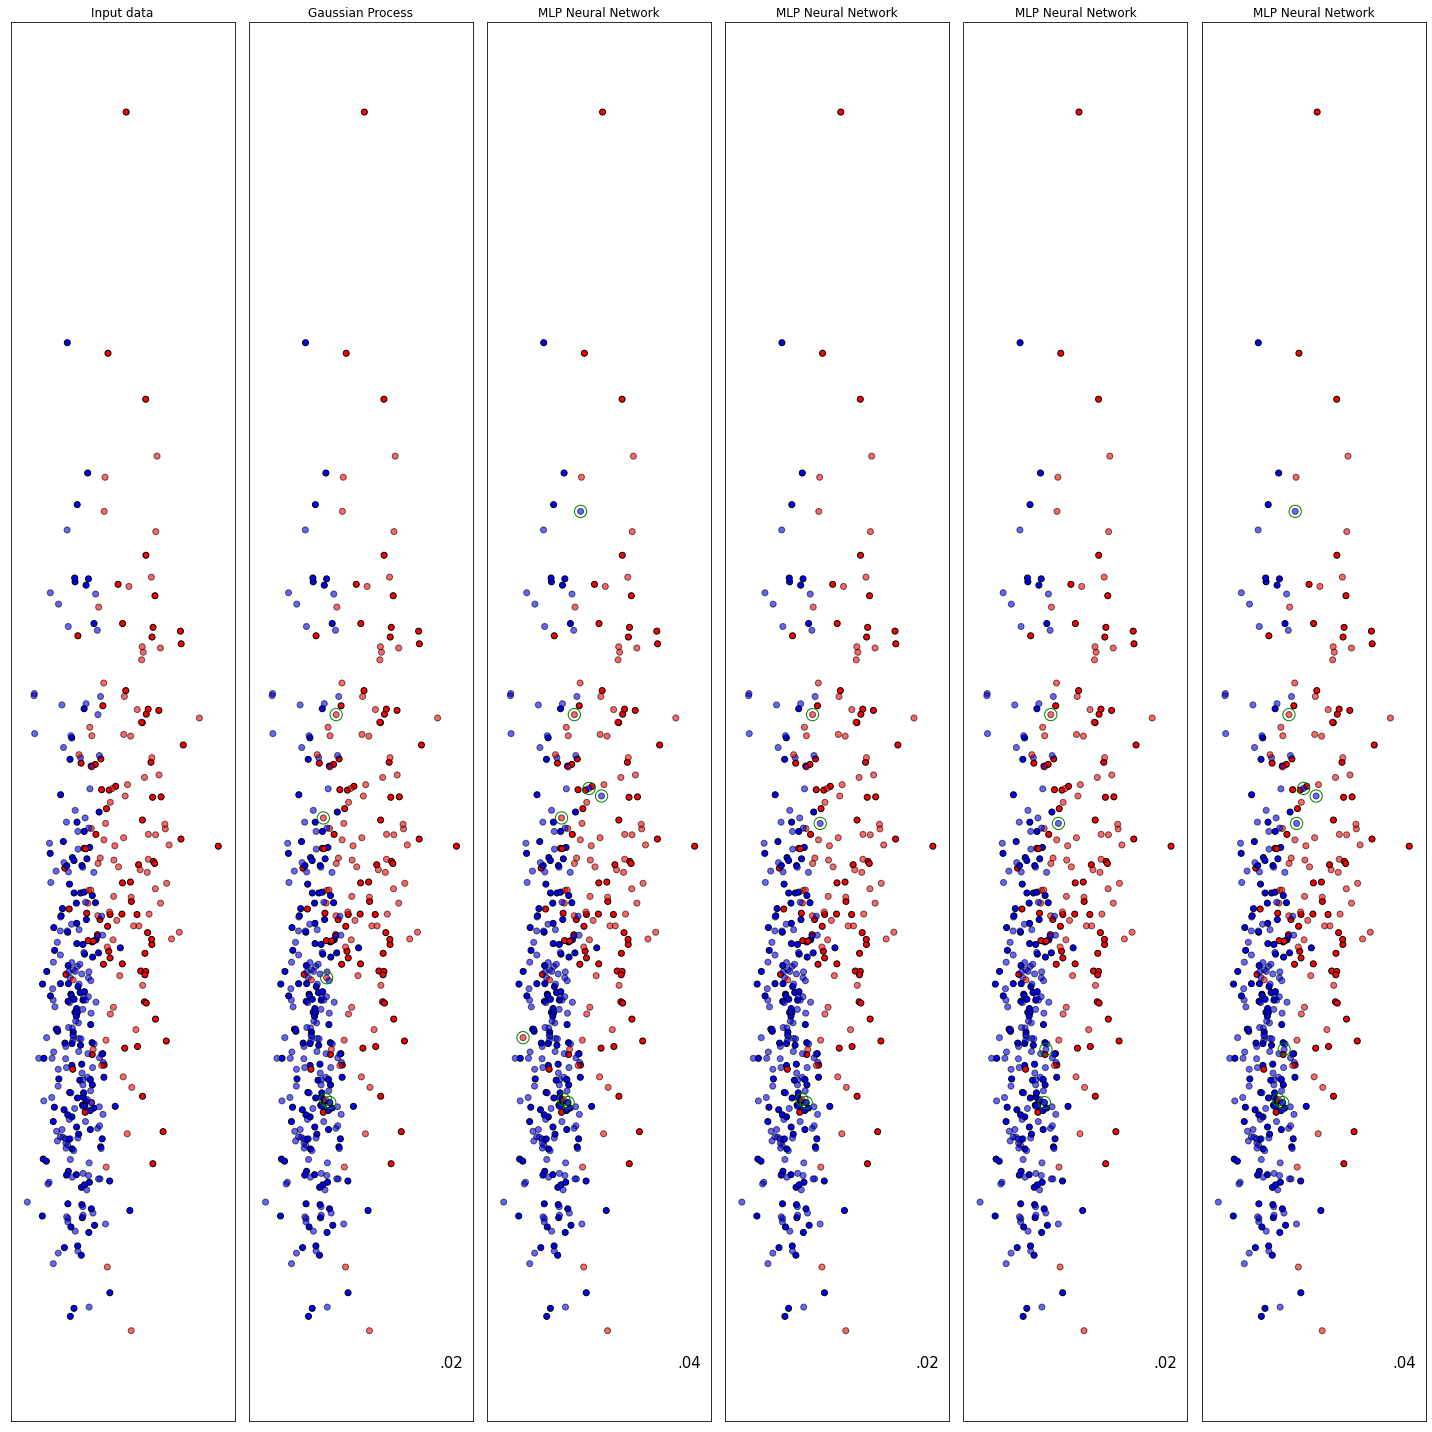

In [21]:
# MARKED FOR DELETION
# These plots do not compare with the figures in Dhari 2019 and so should be ignored.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# For this plot, we perform our validation test

# Color Maps
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

figure = plt.figure(figsize=(20, 20))

# We will test the found top five best algorithms
# We train the datasets in the same way done during genetic search
# We test against the validation set

top_n = 5

testing_set = validation_set
training_set = dataset.training_set

# Create Mesh Grid
h = 0.02

i = 1 # index subplots

X = np.concatenate((training_set.X, testing_set.X), axis=0)
y = np.concatenate((training_set.y, testing_set.y), axis=0)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
              np.arange(y_min, y_max, h))

ax = plt.subplot(1, top_n+1, i)

# Plot the training points and testing points (Input data)
ax.scatter(training_set.X[:, 0], training_set.X[:, 1], c=training_set.y, cmap=cm_bright,
       edgecolors='k')
ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=testing_set.y, cmap=cm_bright, alpha=0.6,
   edgecolors='k')

# Format plot
ax.set_title("Input data")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

hof = my_evolver.hof
top_inds = hof[:top_n]
print(top_inds)

for ind in top_inds:
    i += 1
    # Initialize classifier
    print(ind)
    algo_name = ind[0]
    param_list = ind

    clf = Classifier.algorithmspace[algo_name](param_list)

    predictions = clf.evaluate(training_set, testing_set)

    score = ClassifierFitness().evaluate(predictions, testing_set.y)

    ax = plt.subplot(1, top_n+1, i)

    # Plot the training points and testing points (Input data)
    ax.scatter(training_set.X[:, 0], training_set.X[:, 1], c=training_set.y, cmap=cm_bright,
               edgecolors='k')
    # Plot predictions and fitness score
    ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=predictions, cmap=cm_bright, alpha=0.6,
           edgecolors='k')

    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
        size=15, horizontalalignment='right')

    # Highlight/circle errors
    errors = testing_set.X[predictions != testing_set.y]

    for mistake in errors:
        #err = testing_set.X[mistake,:]
        ax.scatter(mistake[0], mistake[1], marker='o', s=150, lw=1, color="green", facecolor="none")

    # Format plot
    ax.set_title(algo_name)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    print(i)

plt.tight_layout()

## Analyzing Toy Data

In [22]:
import pandas as pd
import os

# Generate data files
# Uncomment the run lines below to generate the data files
# These scripts generate csv data files using the matching (tutorial) algorithm space
# %run  python run_see_classify_sklearn_toy.py --dataset-name=moons --num-gen=10 --pop-size=10 --num-trials=100 --filename-tail=expanded
# %run  python run_see_classify_sklearn_toy.py --dataset-name=circles --num-gen=10 --pop-size=10 --num-trials=100 --filename-tail=expanded
# %run  python run_see_classify_sklearn_toy.py --dataset-name=linearly_separable --num-gen=10 --pop-size=10 --num-trials=100 --filename-tail=expanded

# number of trials = 100, population size = 10, number of generations = 10

# Read data from generated files
moons_df = pd.read_csv("moons_fitness_expanded.csv")
moons_df.columns = ["Trials", "Generation", "HOF[0] fitness"]

circles_df = pd.read_csv("circles_fitness_expanded.csv")
circles_df.columns = ["Trials", "Generation", "HOF[0] fitness"]

lin_sep_df = pd.read_csv("linearly_separable_fitness_expanded.csv")
lin_sep_df.columns = ["Trials", "Generation", "HOF[0] fitness"]

dfs = [moons_df, circles_df, lin_sep_df]

extract_final_generation = list(map(lambda df: df.loc[df["Generation"] == 10], dfs))

extract_hof_fitness_stats = list(
    map(lambda df: df.describe()["HOF[0] fitness"], extract_final_generation)
)

prelim_results = (
    pd.DataFrame(
        {
            "moons": extract_hof_fitness_stats[0],
            "circles": extract_hof_fitness_stats[1],
            "linearly": extract_hof_fitness_stats[2],
        }
    )
    .transpose()
    .rename(columns={"mean": "mean accuracy score", "count": "trials"})
)

tutorial_chosen_fitness = [0.025, 0.075, 0.05]
prelim_results.insert(0, "Tutorial Chosen Fitness", tutorial_chosen_fitness)
prelim_results.drop("trials", axis=1, inplace=True) # Remove trials column if unnecessary
prelim_results = prelim_results.round(2)

prelim_results

,Tutorial Chosen Fitness,mean accuracy score,std,min,25%,50%,75%,max
moons,0.02,0.03,0.01,0.02,0.02,0.02,0.02,0.05
circles,0.08,0.09,0.01,0.08,0.08,0.08,0.10,0.12
linearly,0.05,0.05,0.02,0.05,0.05,0.05,0.05,0.22


## (Preliminary) Analyzing Dhahri 2019 Data

In [1]:
import pandas as pd
import os

# Read data from generated file
df = pd.read_csv("dhahri_2019_fitness_expanded_test.csv")
df.columns = ["Trials", "Generation", "HOF[0] fitness"]

dfs = [df] # Use an array...just in case we can repeat this cell for multiple (paper) works

extract_final_generation = list(map(lambda df: df.loc[df["Generation"] == 10], dfs))

extract_hof_fitness_stats = list(
    map(lambda df: df.describe()["HOF[0] fitness"], extract_final_generation)
)

prelim_results = (
    pd.DataFrame(
        {
            "Breast Cancer Wisconsin (Diagnostic)": extract_hof_fitness_stats[0],
            # Dhahri 2019 used the Breast Cancer Wisconsin (Diagnostic) Data set
        }
    )
    .transpose()
    .rename(columns={"mean": "mean accuracy score", "count": "trials"})
)

prelim_results

# manual best and paper found best via GA in accuracy (not necessarily our accuracy metric?...) 98.24 %
# different metric in terms of log-loss....
# different metric in terms of kFolds to counter overfitting

,trials,mean accuracy score,std,min,25%,50%,75%,max
Breast Cancer Wisconsin (Diagnostic),100.0,0.01114,0.002284,0.008772,0.008772,0.013158,0.013158,0.017544


# Creating Trials
First, **preprocessing** of the provided dataset needs to occur prior to using the classifier pipeline.
We then split the dataset into a training and testing set. The **testing set** will be **stored**
away until the very end where it will be used to compare the best solutions found via Genetic Search.
Solutions will be compared in the form of **side-by-side plots**.
The **training set** will be **further split** into smaller trials that will be used to tune each generation
of algorithms during the Genetic Search algorithm.

In [4]:
# Example run of the default Classifier on the generated trials
individual = Classifier()
data = individual.runAlgo(dataset)
print(data)
print("The fitness score of the default classifier: ", ClassifierFitness().pipe(data).fitness)

<class 'see.classifiers.Classifier'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5

Time: 0.289 s
The fitness score of the default classifier:  0.1


## Genetic Search with Classifiers

## Final Comparison
We compare the found solutions using the testing set that was set aside at the very beginning.
We also train the classifiers using the training set that was made at the very beginning.

*TODO*: I'm not sure if it is correct to retrain the classifiers using the entire training
set. There might be issues with overfitting...

*TODO*: The plots below work nicely because we have two dimension data. Think about what to
do when the feature space is multidimensional.

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN


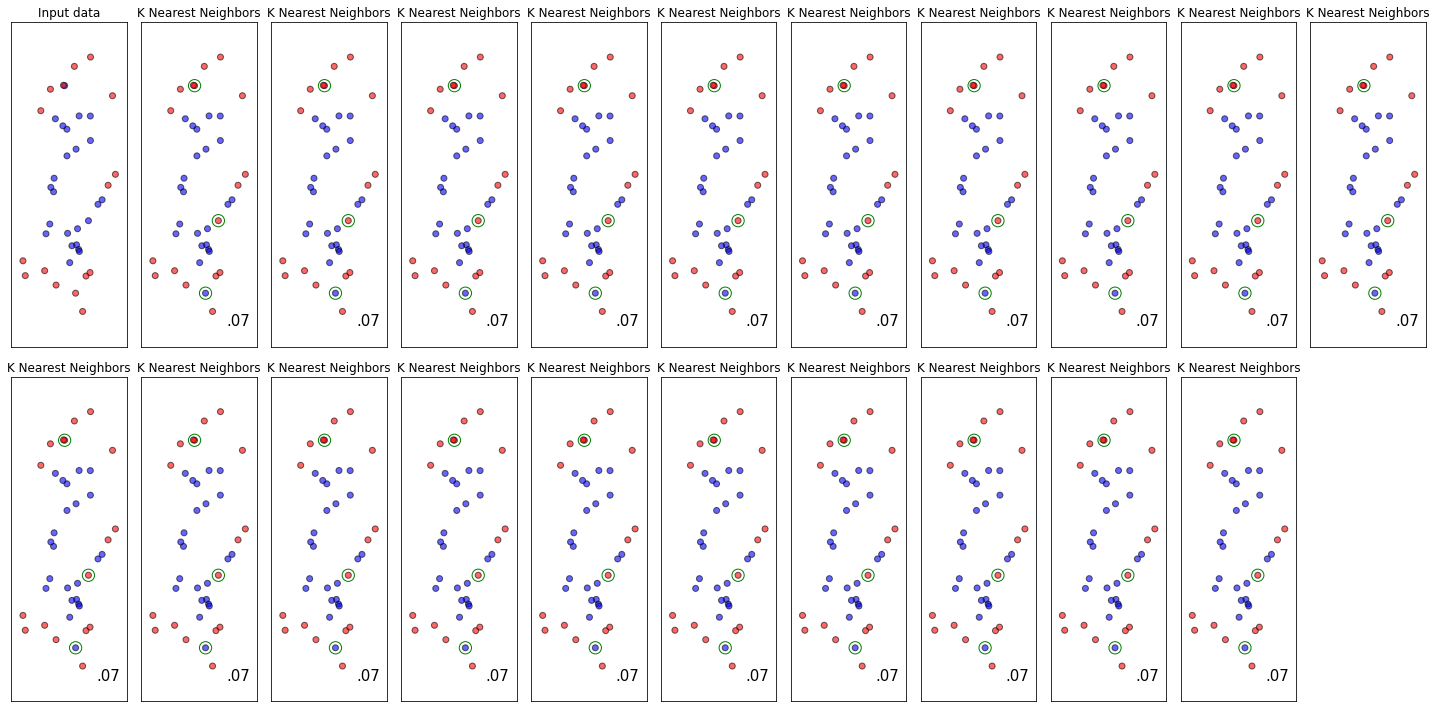

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

solution_set = my_evolver.hof

# Use stored away testing set and the entire training set for final comparisons
training_set = dataset.training_set
testing_set = validation_set

# TODO: Algorithms may be non-deterministic so fitness scores may change
# on different plot iterations...?

# Color Maps
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Create Mesh Grid
h = 0.02
x_min, x_max = testing_set.X[:, 0].min() - .5, testing_set.X[:, 0].max() + .5
y_min, y_max = testing_set.X[:, 1].min() - .5, testing_set.X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                  np.arange(y_min, y_max, h))

figure = plt.figure(figsize=(20, 10))

ax = plt.subplot(2,round(len(solution_set)/2) + 1,1)

# Plot the training points and testing points (Input data)
#ax.scatter(training_set.X[:, 0], training_set.X[:, 1], c=training_set.y, cmap=cm_bright,
#           edgecolors='k')
ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=testing_set.y, cmap=cm_bright, alpha=0.6,
           edgecolors='k')

# Format plot
ax.set_title("Input data")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

for i, ind in enumerate(solution_set):
    # Initialize classifier
    algo_name = ind[0]
    param_list = ind
    clf = Classifier.algorithmspace[algo_name](param_list)
    
    predictions = clf.evaluate(training_set, testing_set)

    ax = plt.subplot(2, round(len(solution_set)/2) + 1,i + 2)

    # Plot predictions and fitness score
    ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=predictions, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    score = ClassifierFitness().evaluate(predictions, testing_set.y)
    
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')

    # Draw Contour/Color Plot
    # TODO: We have to retrain the data set because we
    # we do not store the classifier created in clf#evaluate
    # anywhere. Consider storing it as an attribute.

    #contour_set = pipedata()
    #contour_set.X = np.c_[xx.ravel(), yy.ravel()]
    #Z = clf.evaluate(training_set, contour_set)
    #Z = Z.reshape(xx.shape)
    
    #ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
    
    # Highlight/circle errors
    errors = testing_set.X[predictions != testing_set.y]
    for mistake in errors:
        #err = testing_set.X[mistake,:]
        ax.scatter(mistake[0], mistake[1], marker='o', s=150, lw=1, color="green", facecolor="none")

    # Format plot
    ax.set_title(algo_name)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

plt.tight_layout()

In [10]:
my_evolver.hof[0]
print(my_evolver.hof)

[['K Nearest Neighbors', 1, 0.797, 8, 1, 3], ['K Nearest Neighbors', 52, 0.063, 9, 8, 3], ['K Nearest Neighbors', 1, 0.476, 5, 7, 3], ['K Nearest Neighbors', 1, 0.063, 5, 8, 3], ['K Nearest Neighbors', 52, 0.476, 9, 7, 3], ['K Nearest Neighbors', 1, 0.797, 8, 2, 3], ['K Nearest Neighbors', 95, 0.023, 6, 1, 3], ['K Nearest Neighbors', 1, 0.476, 9, 8, 3], ['K Nearest Neighbors', 52, 0.063, 5, 7, 3], ['K Nearest Neighbors', 52, 0.063, 9, 7, 3], ['K Nearest Neighbors', 1, 0.476, 5, 8, 3], ['K Nearest Neighbors', 68, 0.023, 6, 2, 3], ['K Nearest Neighbors', 55, 0.023, 6, 7, 3], ['K Nearest Neighbors', 1, 0.476, 8, 1, 3], ['K Nearest Neighbors', 55, 0.476, 6, 7, 3], ['K Nearest Neighbors', 1, 0.023, 8, 1, 3], ['K Nearest Neighbors', 95, 0.797, 6, 2, 3], ['K Nearest Neighbors', 95, 0.797, 8, 1, 3], ['K Nearest Neighbors', 1, 0.023, 6, 2, 3], ['K Nearest Neighbors', 68, 0.476, 5, 8, 3]]


In [11]:
list(map(lambda ind: ind.fitness.values[0], my_evolver.hof))

[0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075]

# Comparing Genetic Search and Validation test (incomplete)
and incorrect...

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN


([<matplotlib.axis.XTick at 0x7f7abf8d3460>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

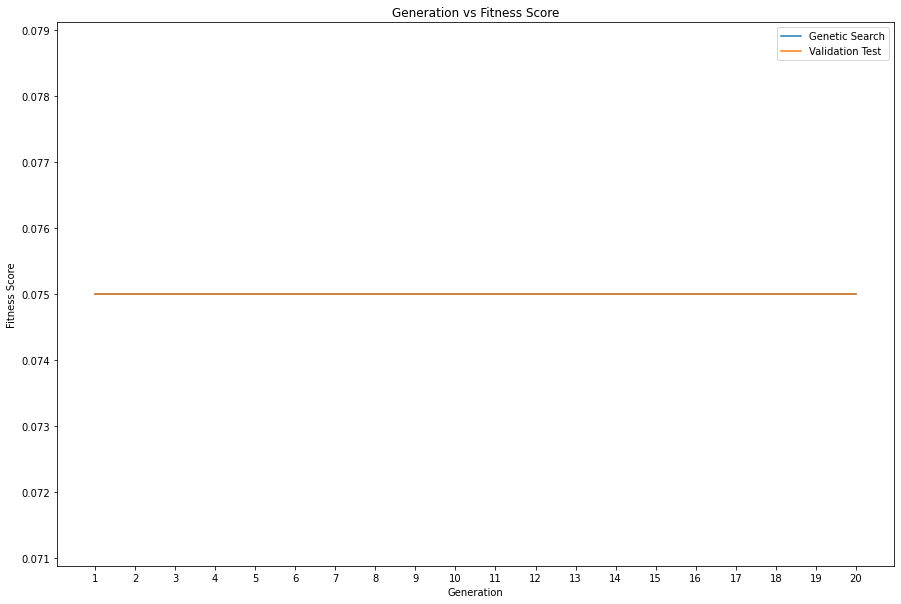

In [12]:
import matplotlib.pyplot as plt

## TODO IMPORTANT READ FIRST: When making this cell, I had thought that hall of fame meant the best of
# each generation. I now believe that the hall of fame is the best individuals throughout
# the entire run of genetic search. This being the case, I need to modify the source code
# to track the generational best in order properly make this plot. 
# Tldr. I believe that the plot below is incorrect.


# The following plot shows:
# 1) The fitness scores of the best individual of each generation during Genetic Search
# 2) The fitness scores of the best individual of each generation when tested on the unseen testing set

solution_set = my_evolver.hof

x = range(1, num_generations + 1)
#x = range(num_generations, 0, -1)

# Extract fitness scores during Genetic Search
y_1 = list(map(lambda ind: ind.fitness.values[0], solution_set))
y_1.reverse()

def score_clf(algo_vector, testing_set):
    algo_name = algo_vector[0]
    param_list = algo_vector
    targets = testing_set.y
    clf = Classifier.algorithmspace[algo_name](param_list)
    predictions = clf.evaluate(training_set, testing_set)
    return ClassifierFitness().evaluate(predictions, targets)
    
y_2 = list(map(lambda ind: score_clf(ind, testing_set), solution_set))
y_2.reverse()

figure = plt.figure(figsize=(15, 10))
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.legend(['Genetic Search', 'Validation Test'])
plt.title('Generation vs Fitness Score')
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.xticks(x)